In [2]:
import sys

import pandas as pd
import seaborn as sns
from spacy import glossary
from tqdm.auto import tqdm
import random

sys.path.append('../')

from src.utils.plot_visualization import plot_histogram

In [7]:
data_folder_path = '../data/input/'
df_train = pd.read_csv(data_folder_path+'train.csv')
df_test = pd.read_csv(data_folder_path+'test.csv')

## Basic data overview

In [4]:
df_train.head(2)

,id,url_legal,license,excerpt,target,standard_error
0,c12129c31,NaN,NaN,When the young people returned to the ballroom...,-0.340259,0.464009
1,85aa80a4c,NaN,NaN,"All through dinner time, Mrs. Fayre was somewh...",-0.315372,0.480805


In [5]:
df_test.head(2)

,id,url_legal,license,excerpt
0,c0f722661,NaN,NaN,My hope lay in Jack's promise that he would ke...
1,f0953f0a5,NaN,NaN,Dotty continued to go to Mrs. Gray's every nig...


In [6]:
print('Train_shape: ', df_train.shape)
print('Test_shape: ', df_test.shape)

Train_shape:  (2834, 6)
Test_shape:  (7, 4)


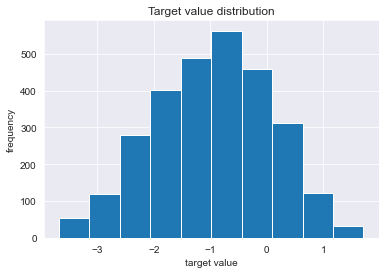

In [8]:
p = plot_histogram(
    df_train, 'target', 
    x_label='target value', y_label='frequency', 
    title='Target value distribution'
)

In [9]:
df_train.target.describe()

count    2834.000000
mean       -0.959319
std         1.033579
min        -3.676268
25%        -1.690320
50%        -0.912190
75%        -0.202540
max         1.711390
Name: target, dtype: float64

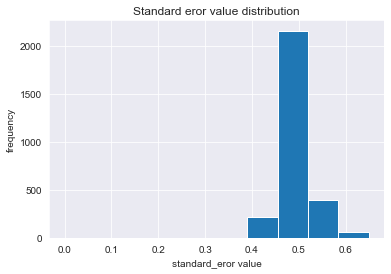

In [10]:
p = plot_histogram(
    df_train, 'standard_error', 
    x_label='standard_eror value', y_label='frequency', 
    title='Standard eror value distribution'
)

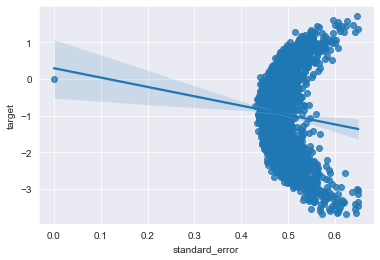

In [12]:
p = sns.regplot(data = df_train, x='standard_error', y='target')

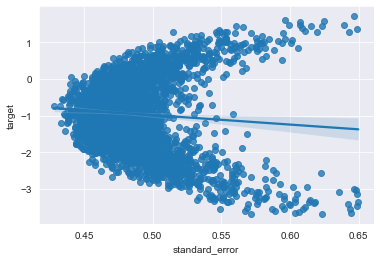

In [13]:
p = sns.regplot(data = df_train[df_train.standard_error > 0.01], x='standard_error', y='target')

As expected - the biggest standard_error near the extream target values

#### Let's take a look at texts with the highest and the lowest target scores

In [12]:
df_train.loc[df_train.target.argmin(),'excerpt']

'The commutator is peculiar, consisting of only three segments of a copper ring, while in the simplest of other continuous current generators several times that number exist, and frequently 120! segments are to be found. These three segments are made so as to be removable in a moment for cleaning or replacement. They are mounted upon a metal support, and are surrounded on all sides by a free air space, and cannot, therefore, lose their insulated condition. This feature of air insulation is peculiar to this system, and is very important as a factor in the durability of the commutator. Besides this, the commutator is sustained by supports carried in flanges upon the shaft, which flanges, as an additional safeguard, are coated all over with hard rubber, one of the finest known insulators. It may be stated, without fear of contradiction, that no other commutator made is so thoroughly insulated and protected. The three commutator segments virtually constitute a single copper ring, mounted i

In [13]:
df_train.loc[df_train.target.argmax(),'excerpt']

'When you think of dinosaurs and where they lived, what do you picture? Do you see hot, steamy swamps, thick jungles, or sunny plains? Dinosaurs lived in those places, yes. But did you know that some dinosaurs lived in the cold and the darkness near the North and South Poles?\nThis surprised scientists, too. Paleontologists used to believe that dinosaurs lived only in the warmest parts of the world. They thought that dinosaurs could only have lived in places where turtles, crocodiles, and snakes live today. Later, these dinosaur scientists began finding bones in surprising places.\nOne of those surprising fossil beds is a place called Dinosaur Cove, Australia. One hundred million years ago, Australia was connected to Antarctica. Both continents were located near the South Pole. Today, paleontologists dig dinosaur fossils out of the ground. They think about what those ancient bones must mean.'

In [14]:
df_train.loc[df_train.target == 0.0,'excerpt'].values[0]

'The sun was shining in a cloudless sky, and no shadows lay on the mountain, and all day long they watched and waited, and at last, when the birds were singing their farewell song to the evening star, the children saw the shadows marching from the glen, trooping up the mountain side and dimming the purple of the heather.\nAnd when the mountain top gleamed like a golden spear, they fixed their eyes on the line between the shadow and the sunshine.\n"Now," said Connla, "the time has come."\n"Oh, look! look!" said Nora, and as she spoke, just above the line of shadow a door opened out, and through its portals came a little piper dressed in green and gold. He stepped down, followed by another and another, until they were nine in all, and then the door slung back again.'

#### Looks like - the easier text - the hiegher target score, and vice versa - the more complex text - lower score

## Text meta feature generation

<AxesSubplot:xlabel='text lengths (count chars)', ylabel='frequency'>

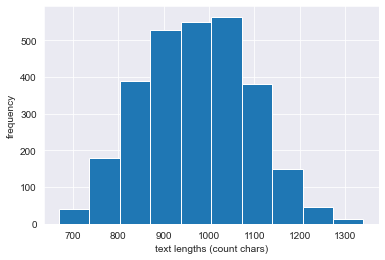

In [15]:
df_train['text_length'] = df_train.excerpt.str.len()
p = df_train['text_length'].hist()
p.set_xlabel("text lengths (count chars)")
p.set_ylabel("frequency")
p

/Users/maks/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='text_length', ylabel='target'>

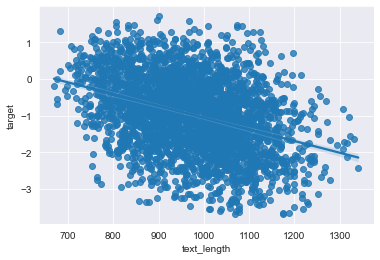

In [16]:
sns.regplot(df_train['text_length'], df_train['target'])